In [45]:
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from colorfilters import HSVFilter

In [129]:
img = cv.imread('./ds28/Left/img3064.png')

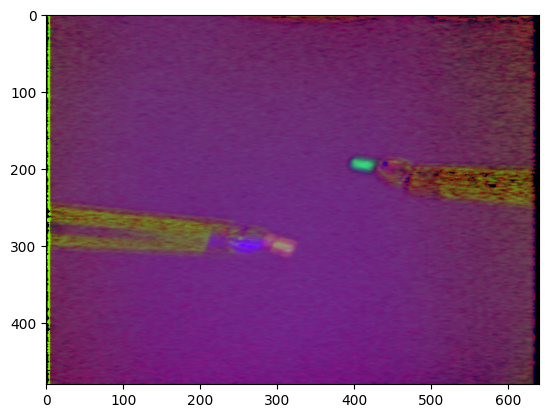

In [130]:
img = cv.imread('./ds28/Left/img3064.png')
# cv.imshow('image',img)
# lower_thresh_g = np.array([0, 55, 75], np.uint8)  # [45,101,52]
# upper_thresh_g = np.array([60, 210, 255], np.uint8)  #[70,245,255]

# lower_thresh_g = np.array([20, 110, 110], np.uint8)  # [45,101,52]
# upper_thresh_g = np.array([70, 245, 255], np.uint8)  #[70,245,255]

# lower_thresh_r = np.array([90, 40, 130], np.uint8)  #  [130, 30, 69],
# upper_thresh_r = np.array([150, 170, 255], np.uint8)  # [180, 255, 255]

lower_thresh_g = np.array([40, 55, 75], np.uint8)
upper_thresh_g = np.array([75, 255, 255], np.uint8)
# lower_thresh_r = np.array([130, 30, 69], np.uint8)  # [140, 35, 58]
# upper_thresh_r = np.array([180, 255, 255], np.uint8)  # [170, 255, 255]

lower_thresh_r = np.array([130, 30, 69], np.uint8)  # [130, 150, 69] [130, 30, 69]
upper_thresh_r = np.array([180, 255, 255], np.uint8)  # [180, 255, 255] [192, 255, 255]

# plt.imshow(img)
# img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
blur = cv.GaussianBlur(img, (3, 3), 0)
hsv = cv.cvtColor(blur, cv.COLOR_BGR2HSV)
# window = HSVFilter(hsv)
# window.show()
plt.imshow(hsv, cmap='hsv')
plt.show()
# m = cv.morphologyEx(hsv, cv.MORPH_CLOSE, kernel=np.ones((3, 3)), iterations=1)
# window = HSVFilter(m)
# window.show()
# plt.imshow(m, cmap='gray')
# plt.show()

302 299


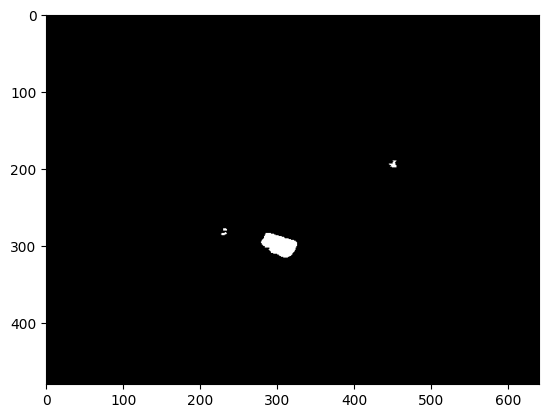

In [131]:
r, c = 0, 0

green = (0, 255, 0)
red = (0, 255, 255)

# mask = cv.inRange(hsv, lower_thresh_g, upper_thresh_g)
mask = cv.inRange(hsv, lower_thresh_r, upper_thresh_r)
# plt.subplot(121)
plt.imshow(mask, cmap='gray')
# plt.subplot(122)
# plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB), cmap='hsv')
# cv.imshow('hsv',hsv)
# cv.waitKey()
# cv.destroyWindow('hsv')
contours, heirarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
areas = [cv.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

if (sorted_areas.any()) and sorted_areas[-1] >= 1:
    cnt = contours[areas.index(sorted_areas[-1])]  # the biggest contour
    m = cv.moments(cnt)
    r = int(m["m10"] / m["m00"])
    c = int(m["m01"] / m["m00"])
    print(r, c)

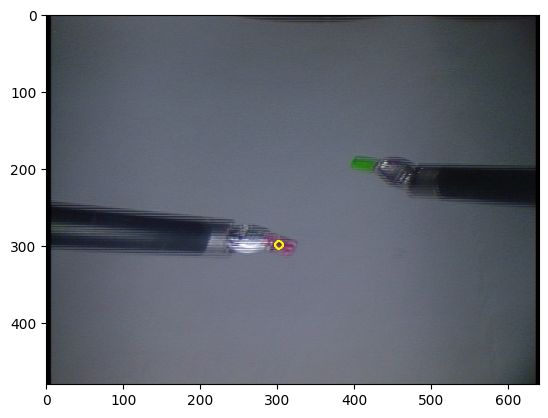

In [132]:
img = cv.circle(img, (r, c), radius=5, thickness=2, color=red)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
num = 28
# Read the CSV file
# data = pd.read_csv('dummy_dataset.csv', header=None, skiprows=1)
x_data = pd.read_csv(f"./ds{num}/{num}_psm1_x.csv", header=0)
y_data = pd.read_csv(f"./ds{num}/{num}_psm1_y.csv", header=0)
x_data = x_data.iloc[:, 1:]
y_data = y_data.iloc[:, 1:]
joined_psm1 = x_data.join(y_data, how='inner')
# print(joined_psm1.head())
# print(joined_psm1.shape)
# print(y_data.head())
# lambda x: float('nan') if x == -1 else x
joined_psm1 = joined_psm1.replace(-1, float('nan'))
print(joined_psm1.head())
print(joined_psm1.shape)
# print(y_data.interpolate())
joined_psm1 = joined_psm1.dropna()
print(joined_psm1.head())
print(joined_psm1.shape)
# x_data = x_data.dropna()
# y_data = y_data.dropna()
# X = x_data.iloc[:, 1:].values
# y = y_data.iloc[:len(X), 1:].values

In [126]:
import cv2 as cv
import argparse

max_value = 255
max_value_H = 360 // 2
low_H = 0
low_S = 0
low_V = 0
high_H = max_value_H
high_S = max_value
high_V = max_value
window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'

In [127]:
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H - 1, low_H)
    cv.setTrackbarPos(low_H_name, window_detection_name, low_H)


def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H + 1)
    cv.setTrackbarPos(high_H_name, window_detection_name, high_H)


def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S - 1, low_S)
    cv.setTrackbarPos(low_S_name, window_detection_name, low_S)


def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S + 1)
    cv.setTrackbarPos(high_S_name, window_detection_name, high_S)


def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V - 1, low_V)
    cv.setTrackbarPos(low_V_name, window_detection_name, low_V)


def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V + 1)
    cv.setTrackbarPos(high_V_name, window_detection_name, high_V)

In [128]:
cv.namedWindow(window_capture_name)
cv.namedWindow(window_detection_name)
cv.createTrackbar(low_H_name, window_detection_name, low_H, max_value_H, on_low_H_thresh_trackbar)
cv.createTrackbar(high_H_name, window_detection_name, high_H, max_value_H, on_high_H_thresh_trackbar)
cv.createTrackbar(low_S_name, window_detection_name, low_S, max_value, on_low_S_thresh_trackbar)
cv.createTrackbar(high_S_name, window_detection_name, high_S, max_value, on_high_S_thresh_trackbar)
cv.createTrackbar(low_V_name, window_detection_name, low_V, max_value, on_low_V_thresh_trackbar)
cv.createTrackbar(high_V_name, window_detection_name, high_V, max_value, on_high_V_thresh_trackbar)

while True:

    frame = cv.imread('./ds28/Left/img3349.png')
    frame_HSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    frame_threshold = cv.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))

    cv.imshow(window_capture_name, frame)
    cv.imshow(window_detection_name, frame_threshold)

    key = cv.waitKey(30)
    if key == ord('q') or key == 27:
        cv.destroyAllWindows()
        break